<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/230303_BabyNamesDataAnalysisAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

##Data import

In [2]:
df = pd.read_csv('/content/drive/MyDrive/230222_Master 12 Advanced Projects/us_baby_names.csv')

In [3]:
df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Name    object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 46.7+ MB


###Changing the type of the data: string -> category

In [5]:
df.Gender = df.Gender.astype('category')

##Most frequent names in 2018

In [6]:
names_2018 = df[df.Year == 2018].copy()

In [7]:
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [10]:
names_2018[names_2018.Gender == 'F'].nlargest(5, 'Count')

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928


In [11]:
names_2018[names_2018.Gender == 'M'].nlargest(5, 'Count')

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389


###Function returning most popular names

In [13]:
def most_pop(year, gender, n = 5):
  return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, 'Count')

In [14]:
most_pop(1900, 'M')

,Year,Name,Gender,Count
54489,1900,John,M,9829
54490,1900,William,M,8579
54491,1900,James,M,7245
54492,1900,George,M,5403
54493,1900,Charles,M,4098


In [15]:
most_pop(1950, 'M')

,Year,Name,Gender,Count
468058,1950,James,M,86224
468059,1950,Robert,M,83559
468060,1950,John,M,79424
468061,1950,Michael,M,65144
468062,1950,David,M,60727


In [17]:
most_pop(1975, 'M')

,Year,Name,Gender,Count
784673,1975,Michael,M,68454
784674,1975,Jason,M,52186
784675,1975,Christopher,M,46592
784676,1975,James,M,39591
784677,1975,David,M,39177


##Are there names that were popular in 1880 and now?

In [18]:
M_1880 = most_pop(1880, 'M', 20)
M_2018 = most_pop(2018, 'M', 20)

In [90]:
pop_male = M_1880[['Name', 'Count']].merge(M_2018[['Name', 'Count']], how = 'inner', on = 'Name', suffixes = ('_1880', '_2018'))

In [91]:
F_1880 = most_pop(1880, 'F', 20)
F_2018 = most_pop(2018, 'F', 20)
pop_female = F_1880[['Name', 'Count']].merge(F_2018[['Name', 'Count']], how = 'inner', on = 'Name', suffixes = ('_1880', '_2018'))

##Are there the same names popular for men and women?

In [28]:
df.groupby(['Name', 'Gender'])['Count'].sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,F,0
Aaban,M,114
Aabha,F,35
Aabha,M,0
Aabid,F,0
...,...,...
Zyyanna,M,0
Zyyon,F,0
Zyyon,M,6


##Data aggregation

In [45]:
agg = df.groupby(['Name', 'Gender']).agg(Total = ('Count', 'sum'),
                                         Num_of_year = ('Count', 'count'),
                                         First_year = ('Year', 'min'),
                                         Last_year = ('Year', 'max'),
                                         Max_count = ('Count', 'max'))

In [46]:
agg

Total  Num_of_year  First_year  Last_year  Max_count
Name    Gender                                                      
Aaban   F           0            0         NaN        NaN        NaN
        M         114           11     2007.00    2018.00      16.00
Aabha   F          35            5     2011.00    2016.00       9.00
        M           0            0         NaN        NaN        NaN
Aabid   F           0            0         NaN        NaN        NaN
...               ...          ...         ...        ...        ...
Zyyanna M           0            0         NaN        NaN        NaN
Zyyon   F           0            0         NaN        NaN        NaN
        M           6            1     2014.00    2014.00       6.00
Zzyzx   F           0            0         NaN        NaN        NaN
        M          10            2     2010.00    2018.00       5.00

[196800 rows x 5 columns]

###Finding the year in which the name was the most popular

In [35]:
def most_pop_in_year(group):
  return group.nlargest(1, 'Count').Year

In [36]:
# most_pop = df.groupby(['Name', 'Gender']).apply(most_pop_in_year)

KeyboardInterrupt: ignored

In [ ]:
# most_pop

In [ ]:
# most_pop.droplevel(-1)

In [ ]:
# agg['Most_pop'] = most_pop.droplevel(-1)

In [57]:
agg.droplevel(-1)

,Total,Num_of_year,First_year,Last_year,Max_count
Name,,,,,
Aaban,0,0,NaN,NaN,NaN
Aaban,114,11,2007.00,2018.00,16.00
Aabha,35,5,2011.00,2016.00,9.00
Aabha,0,0,NaN,NaN,NaN
Aabid,0,0,NaN,NaN,NaN
...,...,...,...,...,...
Zyyanna,0,0,NaN,NaN,NaN
Zyyon,0,0,NaN,NaN,NaN
Zyyon,6,1,2014.00,2014.00,6.00


In [58]:
agg.reset_index(inplace = True)

##Most popular names of all times

In [59]:
agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total'))

Name Gender    Total  Num_of_year  First_year  Last_year  \
Gender                                                                         
F      123434       Mary      F  4125675          139     1880.00    2018.00   
       55100   Elizabeth      F  1638349          139     1880.00    2018.00   
       142434   Patricia      F  1572016          135     1884.00    2018.00   
       83680    Jennifer      F  1467207          101     1916.00    2018.00   
       113152      Linda      F  1452668          139     1880.00    2018.00   
       21348     Barbara      F  1434397          139     1880.00    2018.00   
       121050   Margaret      F  1248985          139     1880.00    2018.00   
       170120      Susan      F  1121703          139     1880.00    2018.00   
       51256     Dorothy      F  1107635          139     1880.00    2018.00   
       157344      Sarah      F  1077746          139     1880.00    2018.00   
M      78267       James      M  5164280          139     1880.00    2018.00   
       86969        John      M  5124817          139     1880.00    2018.00   
       151747     Robert      M  4820129          139     1880.00    2018.00   
       127667    Michael      M  4362731          139     1880.00    2018.00   
       188363    William      M  4117369          139     1880.00    2018.00   
       43431       David      M  3621322          139     1880.00    2018.00   
       88407      Joseph      M  2613304          139     1880.00    2018.00   
       150755    Richard      M  2565301          139     1880.00    2018.00   
       32931     Charles      M  2392779          139     1880.00    2018.00   
       177369     Thomas      M  2311849          139     1880.00    2018.00   

               Max_count  
Gender                    
F      123434   73985.00  
       55100    20744.00  
       142434   56442.00  
       83680    63603.00  
       113152   99689.00  
       21348    48792.00  
       121050   28467.00  
       170120   47402.00  
       51256    39999.00  
       157344   28484.00  
M      78267    94757.00  
       86969    88319.00  
       151747   91640.00  
       127667   92704.00  
       188363   66989.00  
       43431    86253.00  
       88407    32732.00  
       150755   58868.00  
       32931    40770.00  
       177369   48652.00

In [60]:
all_times = agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop = True)

In [61]:
all_times

,Name,Gender,Total,Num_of_year,First_year,Last_year,Max_count
0,Mary,F,4125675,139,1880.00,2018.00,73985.00
1,Elizabeth,F,1638349,139,1880.00,2018.00,20744.00
2,Patricia,F,1572016,135,1884.00,2018.00,56442.00
3,Jennifer,F,1467207,101,1916.00,2018.00,63603.00
4,Linda,F,1452668,139,1880.00,2018.00,99689.00
5,Barbara,F,1434397,139,1880.00,2018.00,48792.00
6,Margaret,F,1248985,139,1880.00,2018.00,28467.00
7,Susan,F,1121703,139,1880.00,2018.00,47402.00
8,Dorothy,F,1107635,139,1880.00,2018.00,39999.00
9,Sarah,F,1077746,139,1880.00,2018.00,28484.00


In [41]:
import seaborn as sns

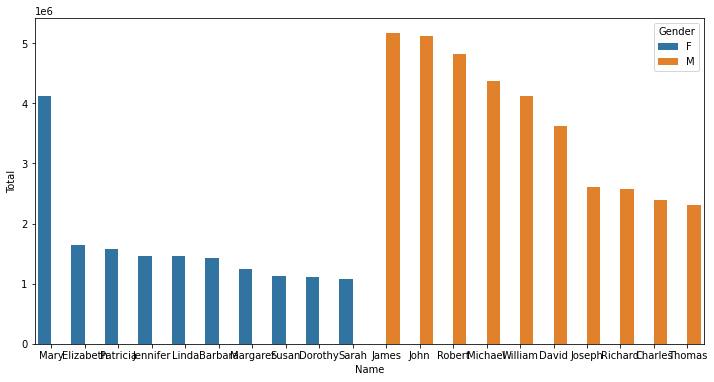

In [63]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Name', y = 'Total', data = all_times, hue = 'Gender')
plt.show()

##General trends over years

###Number of registered babies

In [64]:
pd.options.display.float_format = '{:.0f}'.format

In [65]:
babies_per_year = df.groupby('Year').Count.sum()

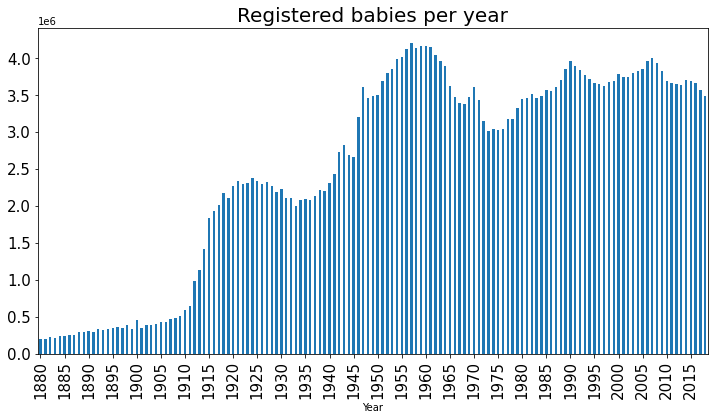

In [66]:
babies_per_year.plot(kind = 'bar', y = 'Count', figsize = (12, 6), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels = range(1880, 2019, 5))
plt.title('Registered babies per year', fontsize = 20)
plt.show()

###Diversity of names

In [67]:
unique_names = df.groupby('Year').Name.count()
unique_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

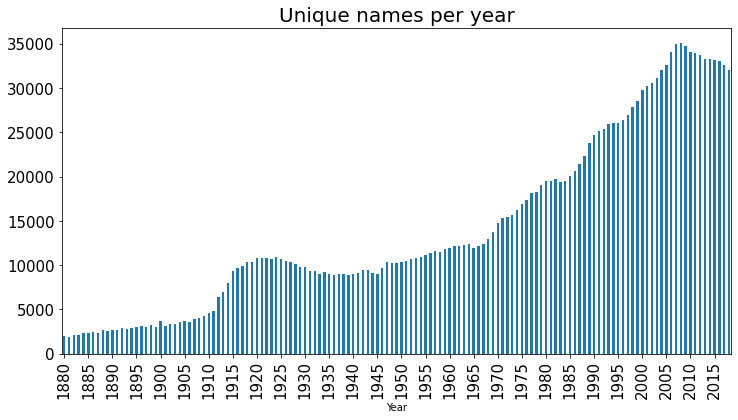

In [68]:
unique_names.plot(kind = 'bar', figsize = (12, 6), fontsize = 15)
plt.xticks(ticks = (range(0, len(unique_names), 5)), labels = range(1880, 2019, 5))
plt.title('Unique names per year', fontsize = 20)
plt.show()

##Additional features - popularity and rank

###Popularity - occurances per million

In [69]:
df.groupby(['Year', 'Gender']).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [70]:
df.groupby(['Year', 'Gender']).Count.transform('sum')

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [72]:
df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1e6

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [73]:
df['Popularity'] = df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1e6

In [74]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


###Rank

In [75]:
df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [76]:
df['Rank'] = df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

In [77]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


##Visualizing name trends over time

In [78]:
mary = df[(df.Name == 'Mary') & (df.Gender == 'F')]

In [80]:
mary.head(10)

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
2000,1881,Mary,F,6919,75245,1
3935,1882,Mary,F,8148,75551,1
6062,1883,Mary,F,8012,71333,1
8146,1884,Mary,F,9217,71439,1
10443,1885,Mary,F,9128,68603,1
12737,1886,Mary,F,9889,68420,1
15129,1887,Mary,F,9888,67735,1
17502,1888,Mary,F,11754,65804,1
20153,1889,Mary,F,11648,65304,1


In [81]:
mary.tail(10)

,Year,Name,Gender,Count,Popularity,Rank
1623431,2009,Mary,F,3163,1724,102
1658147,2010,Mary,F,2871,1617,108
1692223,2011,Mary,F,2706,1540,112
1726140,2012,Mary,F,2576,1465,121
1759884,2013,Mary,F,2651,1514,118
1793168,2014,Mary,F,2632,1477,120
1826414,2015,Mary,F,2631,1478,123
1859539,2016,Mary,F,2508,1420,127
1892548,2017,Mary,F,2402,1397,126
1925138,2018,Mary,F,2327,1379,126


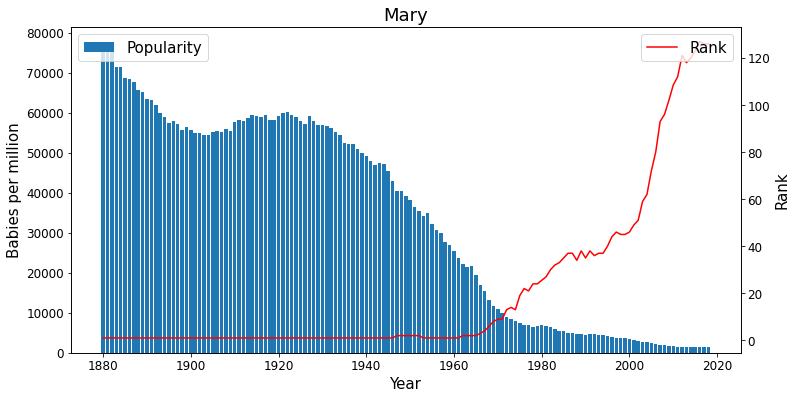

In [82]:
fig, ax1 = plt.subplots(figsize = (12, 6))
ax1.bar(x = mary.Year, height = mary.Popularity, label = 'Popularity')
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = 'red', label = 'Rank')
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('Babies per million', fontsize = 15)
ax2.set_ylabel('Rank', fontsize = 15)
ax1.set_title('Mary', fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [85]:
def plot_name(name, gender, crit = 'Popularity'):
  data = df.loc[(df.Name == name) & (df.Gender == gender), ['Name', 'Gender', 'Year', 'Rank', crit]]
  data = data.set_index('Year')
  fig, ax1 = plt.subplots(figsize = (12, 6))
  ax1.bar(x = data.index, height = data[crit], label = crit)
  ax2 = ax1.twinx()
  ax2.plot(data.index, data.Rank, color = 'red', label = 'Rank')
  ax1.set_xlabel('Year', fontsize = 15)
  ax1.set_ylabel(crit, fontsize = 15)
  ax2.set_ylabel('Rank', fontsize = 15)
  ax1.set_title(name, fontsize = 18)
  ax1.tick_params(labelsize = 12)
  ax2.tick_params(labelsize = 12)
  ax1.legend(loc = 2, fontsize = 15)
  ax2.legend(loc = 1, fontsize = 15)
  plt.show()

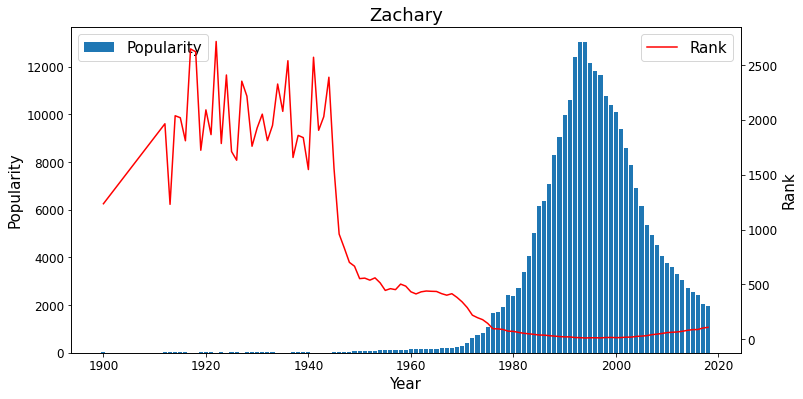

In [87]:
plot_name('Zachary', 'M')

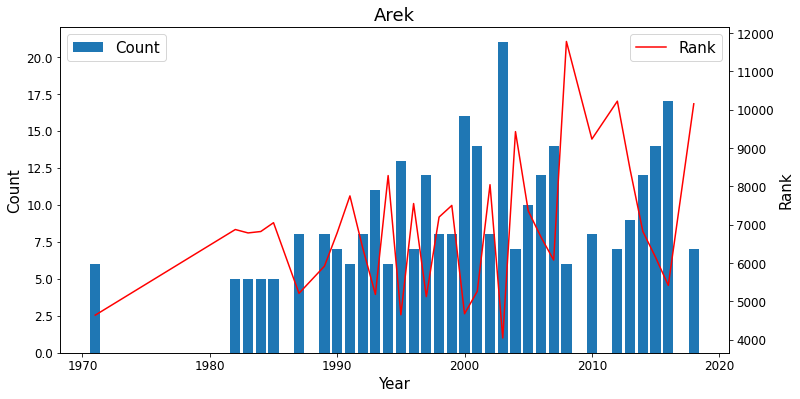

In [89]:
plot_name('Arek', 'M', crit = 'Count')

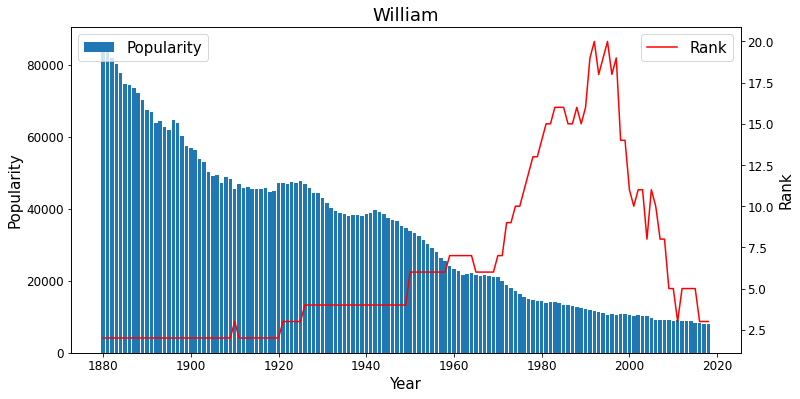

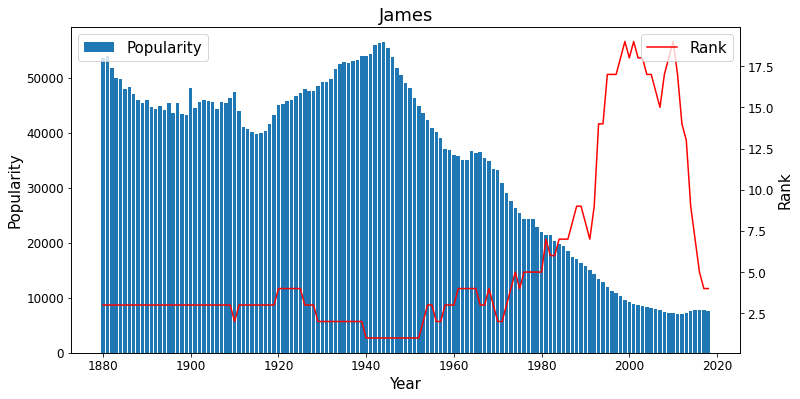

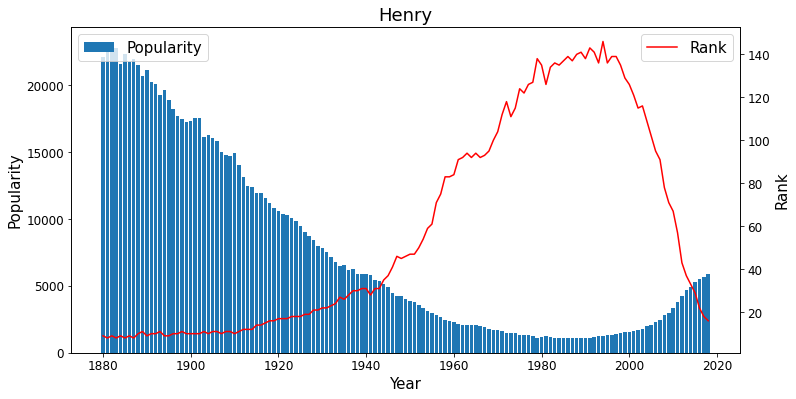

In [93]:
for name in pop_male.Name:
  plot_name(name, 'M')

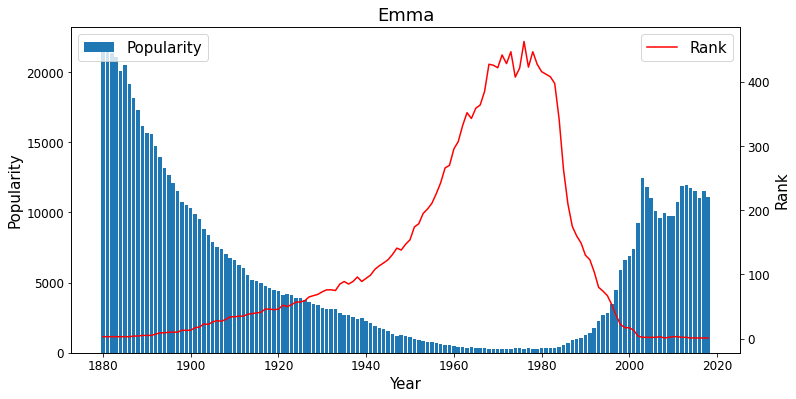

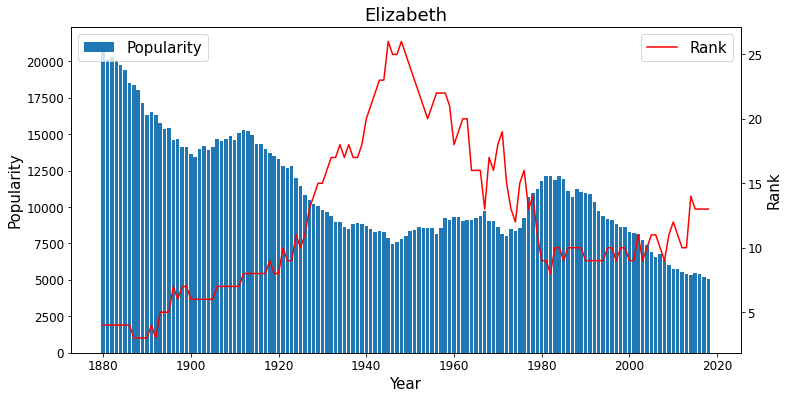

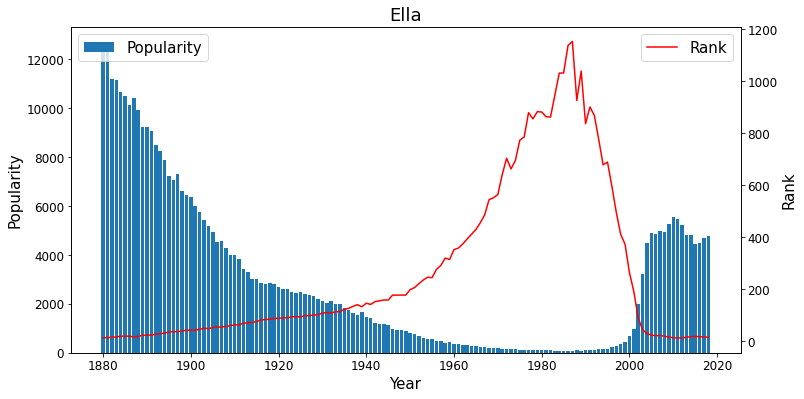

In [94]:
for name in pop_female.Name:
  plot_name(name, 'F')